In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import librosa
import openl3
import numpy as np

In [3]:
from IPython.display import Audio, display as D

In [20]:
model = openl3.models.load_audio_embedding_model(input_repr="mel256", content_type="music", embedding_size=6144)
model.summary()

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 1, 48000)]        0         
_________________________________________________________________
melspectrogram (Sequential)  (None, 256, 199, 1)       0         
_________________________________________________________________
batch_normalization_144 (Bat (None, 256, 199, 1)       4         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 256, 199, 64)      640       
_________________________________________________________________
batch_normalization_145 (Bat (None, 256, 199, 64)      256       
_________________________________________________________________
activation_126 (Activation)  (None, 256, 199, 64)      0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 256, 199, 64)      369

In [21]:
model2 = openl3.models.load_audio_embedding_model(input_repr="mel256", content_type="music", embedding_size=6144, include_frontend=False)
model2.summary()

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 256, 199, 1)]     0         
_________________________________________________________________
batch_normalization_152 (Bat (None, 256, 199, 1)       4         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 256, 199, 64)      640       
_________________________________________________________________
batch_normalization_153 (Bat (None, 256, 199, 64)      256       
_________________________________________________________________
activation_133 (Activation)  (None, 256, 199, 64)      0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 256, 199, 64)      36928     
_________________________________________________________________
batch_normalization_154 (Bat (None, 256, 199, 64)      256

In [22]:
modellin = openl3.models.load_audio_embedding_model(input_repr="linear", content_type="music", embedding_size=6144, include_frontend=False)
modellin.summary()

Model: "model_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 257, 197, 1)]     0         
_________________________________________________________________
batch_normalization_160 (Bat (None, 257, 197, 1)       4         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 257, 197, 64)      640       
_________________________________________________________________
batch_normalization_161 (Bat (None, 257, 197, 64)      256       
_________________________________________________________________
activation_140 (Activation)  (None, 257, 197, 64)      0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 257, 197, 64)      36928     
_________________________________________________________________
batch_normalization_162 (Bat (None, 257, 197, 64)      256

In [23]:
import soundfile as sf

import os
TEST_DIR = '.'#os.path.dirname(__file__)
TEST_AUDIO_DIR = os.path.abspath(os.path.join(TEST_DIR, '../data', 'audio'))
CHIRP_44K_PATH = os.path.join(TEST_AUDIO_DIR, 'chirp_44k.wav')
CHIRP_44K_PATH
# CHIRP_44K_PATH
# audio, sr = sf.read(librosa.example('brahms'))
audio, sr = sf.read(CHIRP_44K_PATH)
audio = audio[:int(sr*10)]
D(Audio(data=audio, rate=sr))
audio.shape, sr, audio.min(), audio.max()

((88200,), 44100, -0.799713134765625, 0.7999267578125)

In [24]:
for input_repr in [None, 'linear', 'mel128', 'mel256']:
    X = openl3.preprocess(audio, sr, input_repr=input_repr)
    print(input_repr, X.shape)

None (16, 1, 48000)
linear (16, 257, 197, 1)
mel128 (16, 128, 199, 1)
mel256 (16, 256, 199, 1)


In [25]:
Z, ts = openl3.get_audio_embedding(audio, sr)
Z.shape, ts.shape

1/1 [==============================] - 2s 2s/step


((16, 6144), (16,))

In [26]:
Z, ts = openl3.get_audio_embedding(audio, sr, frontend='librosa')
Z.shape, ts.shape

1/1 [==============================] - 2s 2s/step


((16, 6144), (16,))

In [27]:
Z, ts = openl3.get_audio_embedding(audio, sr, frontend='librosa', input_repr='linear')
Z.shape, ts.shape

1/1 [==============================] - 1s 1s/step


((16, 6144), (16,))

In [28]:
Z, ts = openl3.get_audio_embedding(audio, sr, frontend='librosa', input_repr='mel128')
Z.shape, ts.shape

1/1 [==============================] - 1s 822ms/step


((16, 6144), (16,))

In [31]:
import matplotlib.pyplot as plt
import librosa.display

In [32]:
plt.rc('figure', figsize=(18, 6))

In [33]:
from openl3.models import load_audio_embedding_model

In [34]:
input_repr = 'linear'
model = load_audio_embedding_model(input_repr=input_repr, content_type="music", embedding_size=6144)
model.summary()
specmodel = type(model)(model.inputs, model.layers[1](model.input))
specmodel.summary()

Model: "model_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 1, 48000)]        0         
_________________________________________________________________
stft_magnitude (Sequential)  (None, 257, 197, 1)       0         
_________________________________________________________________
batch_normalization_256 (Bat (None, 257, 197, 1)       4         
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 257, 197, 64)      640       
_________________________________________________________________
batch_normalization_257 (Bat (None, 257, 197, 64)      256       
_________________________________________________________________
activation_224 (Activation)  (None, 257, 197, 64)      0         
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 257, 197, 64)      369

In [35]:
audio.min(), audio.max()

(-0.799713134765625, 0.7999267578125)

In [36]:
X_kapre = specmodel.predict(openl3.preprocess(audio, sr, hop_size=1))
X_kapre.shape

(3, 257, 197, 1)

In [37]:
X_librosa = openl3.preprocess(audio, sr, hop_size=1, input_repr=input_repr)
X_librosa.shape

(3, 257, 197, 1)

19.99263334527087 -50.0 19.992632 -49.999996


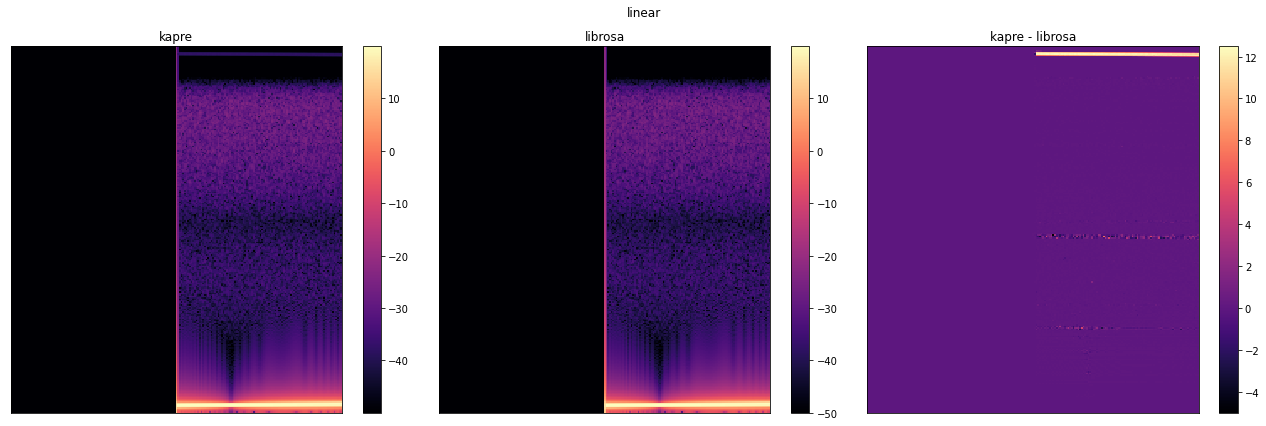

19.55762767003978 -50.0 19.557627 -49.999996


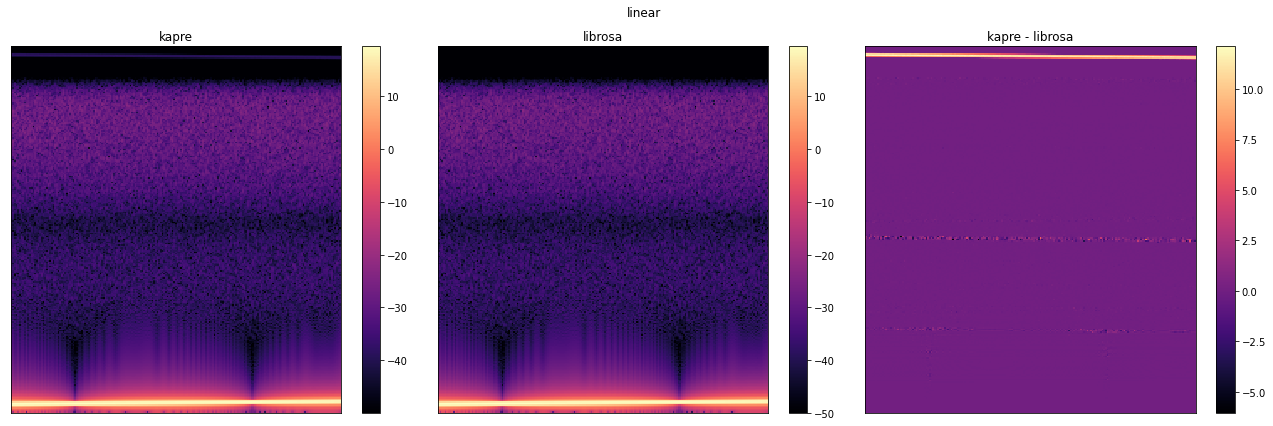

18.532569890664735 -50.0 18.53257 -49.999996


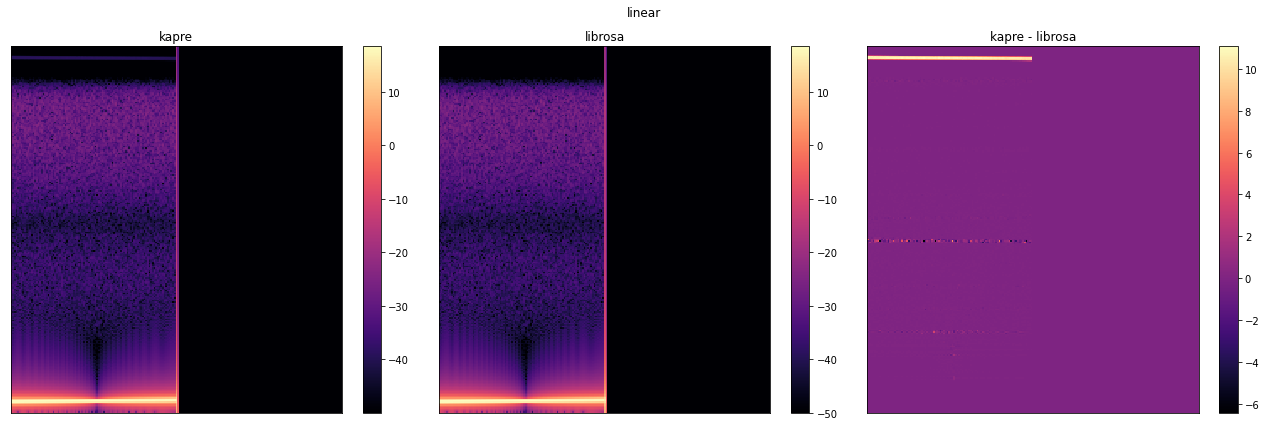

In [38]:
for xk, xl in zip(X_kapre[...,0], X_librosa[...,0]):
    print(xl.max(), xl.min(), xk.max(), xk.min())
#     xl = (xl - xl.max()) / (xl.max() - xl.min())
#     xk = (xk - xk.max()) / (xk.max() - xk.min())
    plt.subplot(131)
    librosa.display.specshow(xk, cmap='magma')
    plt.title('kapre')
    plt.colorbar()
    plt.subplot(132)
    librosa.display.specshow(xl, cmap='magma')
    plt.title('librosa')
    plt.colorbar()
    plt.subplot(133)
    librosa.display.specshow(xk - xl[:,:xk.shape[1]], cmap='magma')
    plt.title('kapre - librosa')
    plt.colorbar()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.suptitle(input_repr)
    plt.show()

In [29]:
# get embedding using kapre frontend 
# (if you want the legacy kapre version - import openl3 from pypi instead)
Z, ts = openl3.get_audio_embedding(audio, sr)
Z, ts = openl3.get_audio_embedding(audio, sr, frontend='kapre')  # equivalent

# get embedding using librosa frontend (matches kapre 0.3.5 implementation)
Z, ts = openl3.get_audio_embedding(audio, sr, frontend='librosa')

# get embedding using librosa frontend (matches kapre 0.1.4 implementation)
import openl3.core
openl3.core.use_librosa_v2(False)
Z, ts = openl3.get_audio_embedding(audio, sr, frontend='librosa')
openl3.core.use_librosa_v2(True)

1/1 [==============================] - 2s 2s/step


In [30]:
input_repr, content_type, embedding_size = 'mel128', 'music', 6144

# get embedding using kapre frontend 
# (if you want the legacy kapre version - import openl3 from pypi instead)
m = openl3.models.load_audio_embedding_model(
    input_repr, content_type, embedding_size)
Z, ts = openl3.get_audio_embedding(audio, sr, model=m)  # kapre

# get embedding using librosa frontend (matches kapre 0.3.5 implementation)
m = openl3.models.load_audio_embedding_model(
    input_repr, content_type, embedding_size, include_frontend=False)
Z, ts = openl3.get_audio_embedding(audio, sr, model=m, input_repr=input_repr)  # librosa

# get embedding using librosa frontend (matches kapre 0.1.4 implementation)
import openl3.core
openl3.core.use_librosa_v2(False)
m = openl3.models.load_audio_embedding_model(
    input_repr, content_type, embedding_size, include_frontend=False)
Z, ts = openl3.get_audio_embedding(audio, sr, model=m, input_repr=input_repr)  # librosa
openl3.core.use_librosa_v2(True)

1/1 [==============================] - 1s 855ms/step
